### Getting Data, Cleaning, and  Preprocessing.


Authors: Hank Bailey, Aidan Ventresca

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labels = {

     "Arborio" :0,

     "Basmati":1,

     "Ipsala":2,

     "Jasmine":3,

     "Karacadag":4,

}



In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#pip install opencv-python
import pandas as pd
import os
import cv2
import numpy as np

In [ ]:
#=====Install cv2 if necessary===#
#pip install opencv-python

#====Import libraries======#
import os
import cv2
import numpy as np

#Make sure what is the main data folder and other sub_folders

data_sub_folders = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


#Give a path for main data folder
data_path = "/content/drive/MyDrive/Machine_Learning/Project2_Group3/Data/"
output_dir_path = "/content/drive/MyDrive/Machine_Learning/Project2_Group3/Results/" #make similar to this path


#=========Create lists for storing images and corresponding labels=====
input_data = []
input_labels = []

#======Run  for loop to read  images from multiple subfolders =======
#for sub_folder_name in os.listdir(data_path): it doesnot work sometime in mac
for sub_folder_name in data_sub_folders:
    path = os.path.join(data_path, sub_folder_name)

    #======Run  for loop to read  images =======
    for file_name in os.listdir(path):

        if file_name.endswith(".jpg"): # change it to ".png" if your images are png images.
            img = cv2.imread(os.path.join(path, file_name))
            #Do you want to resize image? Also, change it if you want to read only gray scale version.
            img = cv2.resize(img, (120, 120), interpolation=cv2.INTER_AREA)
            input_data.append(img)
            input_labels.append(labels[sub_folder_name])



In [ ]:
print(len(input_data))
print(len(labels))

5070
5


In [ ]:
input_data[0].shape # 3 means color image

(120, 120, 3)

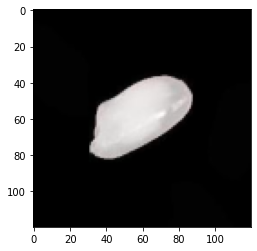

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(input_data[100])
plt.show()

In [ ]:
import numpy as np

input_data_np = np.array(input_data)
input_label_np = np.array(input_labels)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Import necessary
import tensorflow as tf
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, MaxPool2D, Conv2D
from keras.layers import Flatten
from keras.initializers import Constant
from tensorflow.keras import optimizers
from sklearn import metrics
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

#Split data
X_train, X_test, y_train, y_test = train_test_split(input_data, input_labels, test_size=0.30, random_state=20)


In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train.shape

(3549, 120, 120, 3)

In [ ]:
print("X train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X test shape:", X_test.shape, "Y test shape:", y_test.shape)

X train shape: (3549, 120, 120, 3) y_train shape: (3549,)
X test shape: (1521, 120, 120, 3) Y test shape: (1521,)


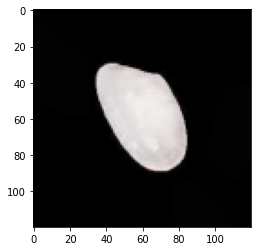

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()

In [ ]:
labels_2 = {

  0: 'Arborio',

  1: 'Basmati',

  2: 'Ipsala',

  3: 'Jasmine',

  4: 'Karacadag',

}

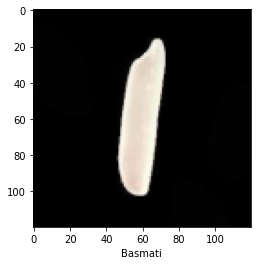

In [ ]:
plt.imshow(X_train[2], cmap = 'gray')
plt.xlabel(labels_2[y_train[2]])
plt.show()

In [ ]:
def load_random_img(dir, label):
  plt.figure(figsize=(10,10))
  i=0
  for label in rice_classes:
    i+=1
    plt.subplot(1, 5, i)
    file = random.choice(os.listdir(f'{dir}/{label}'))
    image_path = os.path.join(f'{dir}/{label}', file)
    img=cv2.imread(image_path)
    plt.title(label)
    plt.imshow(img)
    plt.grid(None)
    plt.axis('off')

In [ ]:
def plot_images(instances, size,  images_per_row = 10, **options):

    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap='gray', **options)
    plt.axis("off")

In [ ]:
X_train = X_train / 255
X_test =  X_test / 255

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 120, 120, 3)
X_test = X_test.reshape(X_test.shape[0], 120, 120, 3)

In [ ]:
from keras.utils import to_categorical

#Convert one-dimensional class arrays (output) into 10-dimensional class matrices:
y_train = to_categorical(y_train, 10)
y_test =  to_categorical(y_test, 10)
#to_categorical: Converts a class vector (integers) to binary class matrix

In [ ]:
print(y_train.shape)
print(y_test.shape)


(3549, 10)
(1521, 10)


In [ ]:
def write_dic_to_file(dic_name, file_name):
  file = open(file_name, 'w')
  file.write(str(dic_name))
  file.close()

import ast
def read_dic_from_file(file_name):
  file = open(file_name, "r")
  contents = file.read()
  dictionary = ast.literal_eval(contents)
  file.close()
  return dictionary



def create_error_plot(model_history):
  loss =  model_history.history['loss']
  val_loss = model_history.history['val_loss']
  accuracy = model_history.history['accuracy']
  val_acc = model_history.history['val_accuracy']

  #epochs = np.arange(len(loss))

  epochs = model_history.epoch
  fig = plt.figure(figsize = (12,5))

  plt.subplot(121)
  plt.plot(epochs, loss, color = 'red', marker = "s")
  plt.plot(epochs, val_loss, marker = "^")
  plt.legend(["loss", "validation loss"], loc="best")
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.title("Training and Validation Loss")

  plt.subplot(122)
  plt.plot(epochs, accuracy, color = 'red', marker = "o")
  plt.plot(epochs, val_acc, marker = "v")
  plt.legend(["accuracy", "validation accuracy"], loc="best")
  plt.xlabel("epoch")
  plt.ylabel("accuracy")
  plt.title("Training and Validation Accuracy Scores")
  fig.savefig(output_dir_path + "error_plot.png", dpi = 600)
  plt.show()

In [ ]:
def Build_CNN_Model(conv_layers, dense_layers, kernel_size = (2, 2),  input_shape = (28, 28, 1), output_dim = 10,  optimizer = 'Adam', learning_rate = 0.001, verbose = 1):

  #====Start model initialization====
  model = Sequential()

  #=====Add convolution layers=====
  for i in range(len(conv_layers)):
    if len(conv_layers) == 1:
      model.add(Conv2D(np.int(conv_layers[i]), kernel_size = kernel_size, input_shape = input_shape, activation='relu',  strides = 1, padding = 'same'))
      model.add(MaxPool2D(padding = 'same'))
    else:

      if i == 0:
        model.add(Conv2D(np.int(conv_layers[i]), kernel_size = kernel_size, input_shape = input_shape, activation='relu',  strides = 1, padding = 'same'))
        model.add(MaxPool2D(padding='same'))

      else:
        model.add(Conv2D(np.int(conv_layers[i]), kernel_size = kernel_size, activation='relu',  strides = 1, padding = 'same'))
        model.add(MaxPool2D(padding='same'))

  #=====Flatten the output from Convolution + Pooling Layer =====
  model.add(Flatten())

  #=====Adding fully connected (dense ) layers =====
  for i in range(len(dense_layers)):
    model.add(Dense(np.int(dense_layers[i]),  activation='relu'))
    #model.add(Dropout(0.10))

  #=====Adding output layers =====
  model.add(Dense(np.int(output_dim),  activation = 'softmax'))

  #=====Select Optimizer =====
  if optimizer == 'Adam':
    opt = optimizers.Adam(learning_rate = learning_rate)
  elif optimizer == 'Adagrad':
    opt = optimizers.Adagrad(learning_rate = learning_rate)
  elif optimizer == 'Nadam':
    opt = optimizers.Nadam(learning_rate = learning_rate)
  elif optimizer == 'Adadelta':
    opt = optimizers.Adadelta(learning_rate= learning_rate)
  elif optimizer == 'RMSprop':
    opt = optimizers.RMSprop(learning_rate= learning_rate)
  else:
    print("No optimizer found in the list(['Adam', 'Adagrad','Nadam', 'Adadelta', 'RMSprop'])! \
    Please apply your optimizer manually...")

  #=====Compile Model =====
  model.compile(loss='categorical_crossentropy', optimizer = opt,  metrics = ['accuracy'])

  if verbose == 1:
    print(model.summary())
  return model

In [ ]:
#test if the function is working

conv_layers = [32, 16]

dense_layers = [ 20, 10]

kernel_size =  (2,2)

input_shape = (28, 28, 1)

output_dim = 10

optimizer = 'Adam'

learning_rate = 0.001

verbose = 1

Build_CNN_Model(conv_layers, dense_layers,  kernel_size, input_shape, output_dim, optimizer, learning_rate, verbose )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                1

In [ ]:
def CNN_Model (conv_layers =  [32, 16],
               dense_layers = [20, 10],
               kernel_size = (2,2),
               input_shape = (120, 120, 3),
               output_dim  = 10,
               optimizer = 'Adam',
               learning_rate = 0.001,
               X_train = None,
               y_train = None,
               X_test =  None,
               y_test =  None,
               val_split = 0.2,
               batch_size = 32,
               epochs = 2,
               verbose = 1):

  print('Building CNN Model.......................\n')
  #Build CNN model
  model = Build_CNN_Model(conv_layers, dense_layers,  kernel_size, input_shape, output_dim, optimizer, learning_rate, verbose =0 )

  print('Fitting  CNN Model.......................\n')
  #Fit CNN model
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 10)
  #history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs,  validation_split = val_split, callbacks = [callback], verbose = verbose)
  history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs,  validation_split = val_split, verbose = verbose)

  print('Calculating predictions and scores....')
  print('Calculating predictions and scores.......................\n')

  #Calculate predictions
  pred = model.predict(X_test)

  #Calculate test scores
  scores = model.evaluate(X_test, y_test)

  #Create plots
  #create_error_plot(history)

  print('Collecting outputs.......................\n')
  output = {
            'model': model,
            'model_history': history,
            'test_loss': scores[0],
            'test_acc': scores[1],
            'test_predictions': pred,
       }

  print('Congratuations! All the processes are completed successfully....\n')
  return output


In [ ]:
model_output = CNN_Model (conv_layers =  [16, 8],
                    dense_layers = [10, 5],
                    kernel_size = (2,2) ,
                    input_shape = (120, 120, 3),
                    output_dim  = 10,
                    optimizer = 'Adam',
                    learning_rate = 0.001,
                    X_train = X_train,
                    y_train = y_train,
                    X_test = X_test,
                    y_test =  y_test,
                    val_split = 0.2,
                    batch_size = 32,
                    epochs = 50,
                    verbose = 1
                    )


Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/50
89/89 [==============================] - 23s 248ms/step - loss: 1.4709 - accuracy: 0.4685 - val_loss: 0.6974 - val_accuracy: 0.7169
Epoch 2/50
89/89 [==============================] - 20s 223ms/step - loss: 0.4900 - accuracy: 0.8327 - val_loss: 0.3915 - val_accuracy: 0.8789
Epoch 3/50
89/89 [==============================] - 23s 256ms/step - loss: 0.2665 - accuracy: 0.9296 - val_loss: 0.2006 - val_accuracy: 0.9577
Epoch 4/50
89/89 [==============================] - 21s 236ms/step - loss: 0.1879 - accuracy: 0.9451 - val_loss: 0.1529 - val_accuracy: 0.9634
Epoch 5/50
89/89 [==============================] - 21s 234ms/step - loss: 0.1372 - accuracy: 0.9598 - val_loss: 0.1440 - val_accuracy: 0.9634
Epoch 6/50
89/89 [==============================] - 24s 269ms/step - loss: 0.1008 - accuracy: 0.9708 - val_loss: 0.1221 - val_accuracy: 0.9718
Epoch 7/50
89/89 [==============================] - 20s 

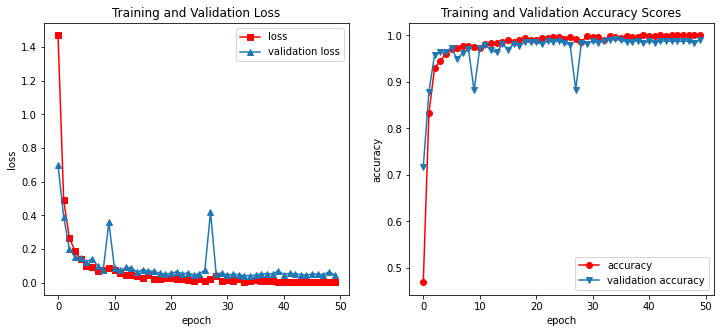

In [ ]:
create_error_plot(model_output['model_history'])

In [ ]:
def Multi_Run_CNN_Model(num_replicates =  None,
                      conv_layers = None,
                      dense_layers =  None,
                      kernel_size =  None,
                      input_shape =  None,
                      output_dim  =  None,
                      optimizer =  None,
                      learning_rate = None,
                      X_train = None,
                      y_train = None,
                      X_test =  None,
                      y_test =  None,
                      val_split = None,
                      batch_size =  None,
                      epochs =  None,
                      verbose =  None,
                      ):


  all_test_acc = []
  best_test_acc = 0
  best_replicate = None,
  best_test_model = None,

  for i in range(num_replicates):
    print('===== Running ' + str(i) +" replicate=======")

    model_output = CNN_Model (conv_layers = conv_layers,
                              dense_layers = dense_layers,
                              kernel_size = kernel_size,
                              input_shape =input_shape,
                              output_dim = output_dim,
                              optimizer  =  optimizer,
                              learning_rate= learning_rate,
                              X_train=  X_train,
                              y_train =  y_train,
                              X_test = X_test,
                              y_test =  y_test,
                              val_split= val_split,
                              epochs =  epochs,
                              verbose = 1)

    all_test_acc.append(model_output['test_acc'])

    if model_output['test_acc'] > best_test_acc:
      best_test_model = model_output
      best_replicate = i


  avg_test_acc = np.mean(np.array(all_test_acc))

  output = {
      'best_model':  best_test_model,
      'best_replicate': best_replicate,
      'all_test_acc': all_test_acc,
      'average_test_acc': avg_test_acc
  }

  file_name = output_dir_path+ "multi-run-cnn-" + str(conv_layers) +"-conv_layers-"+ str(dense_layers) + "-dense_layers-"+ "results" + ".txt"
  write_dic_to_file(output, file_name)

  print('Avarage test accuracy: ', avg_test_acc)

  return output

In [ ]:
model_output = Multi_Run_CNN_Model(num_replicates = 2, conv_layers =  [16, 8],
                    dense_layers = [10, 5],
                    kernel_size = (2,2) ,
                    input_shape = (120, 120, 3),
                    output_dim  = 10,
                    optimizer = 'Adam',
                    learning_rate = 0.001,
                    X_train = X_train,
                    y_train = y_train,
                    X_test = X_test,
                    y_test =  y_test,
                    val_split = 0.2,
                    batch_size = 32,
                    epochs = 5,
                    verbose = 1
                    )

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/5
89/89 [==============================] - 24s 258ms/step - loss: 1.9375 - accuracy: 0.2138 - val_loss: 1.2838 - val_accuracy: 0.6085
Epoch 2/5
89/89 [==============================] - 22s 247ms/step - loss: 0.8445 - accuracy: 0.7024 - val_loss: 0.4426 - val_accuracy: 0.8268
Epoch 3/5
89/89 [==============================] - 23s 255ms/step - loss: 0.3538 - accuracy: 0.8256 - val_loss: 0.2484 - val_accuracy: 0.8493
Epoch 4/5
89/89 [==============================] - 25s 281ms/step - loss: 0.2277 - accuracy: 0.9190 - val_loss: 0.2670 - val_accuracy: 0.9296
Epoch 5/5
89/89 [==============================] - 23s 254ms/step - loss: 0.1567 - accuracy: 0.9613 - val_loss: 0.1184 - val_accuracy: 0.9789
Calculating predictions and scores....
Calculating predictions and scores.......................

48/48 [==============================] - 4s 83ms/step - loss: 0.1826 - ac

In [ ]:
case1_model_output = Multi_Run_CNN_Model(num_replicates = 10,
                                   conv_layers =  [32],
                                   dense_layers = [20],
                                   kernel_size = (2,2) ,
                                   input_shape = (120, 120, 3),
                                    output_dim  = 10,
                                    optimizer = 'Adam',
                                    learning_rate = 0.01,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test,
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20,
                                    verbose = 1
                                    )

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
89/89 [==============================] - 25s 271ms/step - loss: 0.8203 - accuracy: 0.8355 - val_loss: 0.2141 - val_accuracy: 0.9183
Epoch 2/20
89/89 [==============================] - 21s 240ms/step - loss: 0.0968 - accuracy: 0.9655 - val_loss: 0.0553 - val_accuracy: 0.9831
Epoch 3/20
89/89 [==============================] - 24s 266ms/step - loss: 0.0390 - accuracy: 0.9880 - val_loss: 0.0474 - val_accuracy: 0.9817
Epoch 4/20
89/89 [==============================] - 22s 246ms/step - loss: 0.0138 - accuracy: 0.9947 - val_loss: 0.0498 - val_accuracy: 0.9803
Epoch 5/20
89/89 [==============================] - 22s 251ms/step - loss: 0.0083 - accuracy: 0.9979 - val_loss: 0.0546 - val_accuracy: 0.9803
Epoch 6/20
89/89 [==============================] - 21s 240ms/step - loss: 0.0186 - accuracy: 0.9926 - val_loss: 0.0597 - val_accuracy: 0.9775
Epoch 7/20
89/89 [=====

In [ ]:
case2_model_output = Multi_Run_CNN_Model(num_replicates = 5,
                                   conv_layers =  [32],
                                   dense_layers = [20],
                                   kernel_size = (2,2) ,
                                   input_shape = (120, 120, 3),
                                    output_dim  = 10,
                                    optimizer = 'Adagrad',
                                    learning_rate = 0.01,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test,
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20,
                                    verbose = 1
                                    )

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
89/89 [==============================] - 26s 269ms/step - loss: 0.7888 - accuracy: 0.6869 - val_loss: 0.3035 - val_accuracy: 0.9451
Epoch 2/20
89/89 [==============================] - 24s 272ms/step - loss: 0.2139 - accuracy: 0.9458 - val_loss: 0.1431 - val_accuracy: 0.9606
Epoch 3/20
89/89 [==============================] - 29s 322ms/step - loss: 0.0998 - accuracy: 0.9768 - val_loss: 0.0742 - val_accuracy: 0.9803
Epoch 4/20
89/89 [==============================] - 23s 259ms/step - loss: 0.0709 - accuracy: 0.9803 - val_loss: 0.1313 - val_accuracy: 0.9648
Epoch 5/20
89/89 [==============================] - 24s 267ms/step - loss: 0.0647 - accuracy: 0.9796 - val_loss: 0.0585 - val_accuracy: 0.9803
Epoch 6/20
89/89 [==============================] - 23s 259ms/step - loss: 0.0540 - accuracy: 0.9831 - val_loss: 0.0552 - val_accuracy: 0.9803
Epoch 7/20
89/89 [=====

In [ ]:
case3_model_output = Multi_Run_CNN_Model(num_replicates = 2,
                                   conv_layers =  [32],
                                   dense_layers = [20],
                                   kernel_size = (2,2) ,
                                   input_shape = (120, 120, 3),
                                    output_dim  = 10,
                                    optimizer = 'Adagrad',
                                    learning_rate = 0.001,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test,
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20,
                                    verbose = 1
                                    )

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
89/89 [==============================] - 26s 280ms/step - loss: 1.5151 - accuracy: 0.5734 - val_loss: 0.9799 - val_accuracy: 0.8732
Epoch 2/20
89/89 [==============================] - 23s 257ms/step - loss: 0.7358 - accuracy: 0.9119 - val_loss: 0.5760 - val_accuracy: 0.9620
Epoch 3/20
89/89 [==============================] - 26s 288ms/step - loss: 0.4629 - accuracy: 0.9563 - val_loss: 0.4078 - val_accuracy: 0.9394
Epoch 4/20
89/89 [==============================] - 25s 277ms/step - loss: 0.3322 - accuracy: 0.9687 - val_loss: 0.2961 - val_accuracy: 0.9746
Epoch 5/20
89/89 [==============================] - 23s 253ms/step - loss: 0.2604 - accuracy: 0.9704 - val_loss: 0.2364 - val_accuracy: 0.9746
Epoch 6/20
89/89 [==============================] - 23s 254ms/step - loss: 0.2141 - accuracy: 0.9760 - val_loss: 0.1999 - val_accuracy: 0.9746
Epoch 7/20
89/89 [=====

In [ ]:
case4_model_output = Multi_Run_CNN_Model(num_replicates = 2,
                                   conv_layers =  [32],
                                   dense_layers = [20],
                                   kernel_size = (2,2) ,
                                   input_shape = (120, 120, 3),
                                    output_dim  = 10,
                                    optimizer = 'Adam',
                                    learning_rate = 0.001,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test,
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20,
                                    verbose = 1
                                    )

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
89/89 [==============================] - 31s 328ms/step - loss: 0.3853 - accuracy: 0.8735 - val_loss: 0.0917 - val_accuracy: 0.9761
Epoch 2/20
89/89 [==============================] - 23s 263ms/step - loss: 0.0494 - accuracy: 0.9856 - val_loss: 0.0415 - val_accuracy: 0.9901
Epoch 3/20
89/89 [==============================] - 23s 259ms/step - loss: 0.0482 - accuracy: 0.9834 - val_loss: 0.0909 - val_accuracy: 0.9676
Epoch 4/20
89/89 [==============================] - 25s 286ms/step - loss: 0.0447 - accuracy: 0.9834 - val_loss: 0.0612 - val_accuracy: 0.9789
Epoch 5/20
89/89 [==============================] - 24s 275ms/step - loss: 0.0162 - accuracy: 0.9951 - val_loss: 0.0429 - val_accuracy: 0.9859
Epoch 6/20
89/89 [==============================] - 23s 262ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.0406 - val_accuracy: 0.9873
Epoch 7/20
89/89 [=====

In [ ]:
case5_model_output = Multi_Run_CNN_Model(num_replicates = 2,
                                   conv_layers =  [32, 16],
                                   dense_layers = [20, 10],
                                   kernel_size = (2,2) ,
                                   input_shape = (120, 120, 3),
                                    output_dim  = 10,
                                    optimizer = 'Adam',
                                    learning_rate = 0.01,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test,
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20,
                                    verbose = 1
                                    )

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
89/89 [==============================] - 31s 345ms/step - loss: 0.6366 - accuracy: 0.7739 - val_loss: 0.1507 - val_accuracy: 0.9451
Epoch 2/20
89/89 [==============================] - 34s 379ms/step - loss: 0.0996 - accuracy: 0.9662 - val_loss: 0.1079 - val_accuracy: 0.9648
Epoch 3/20
89/89 [==============================] - 30s 341ms/step - loss: 0.0659 - accuracy: 0.9764 - val_loss: 0.0655 - val_accuracy: 0.9817
Epoch 4/20
89/89 [==============================] - 32s 357ms/step - loss: 0.0694 - accuracy: 0.9736 - val_loss: 0.1128 - val_accuracy: 0.9648
Epoch 5/20
89/89 [==============================] - 32s 360ms/step - loss: 0.0611 - accuracy: 0.9775 - val_loss: 0.1094 - val_accuracy: 0.9535
Epoch 6/20
89/89 [==============================] - 30s 338ms/step - loss: 0.0544 - accuracy: 0.9813 - val_loss: 0.0703 - val_accuracy: 0.9803
Epoch 7/20
89/89 [=====

In [ ]:
case5_model_output = Multi_Run_CNN_Model(num_replicates = 2,
                                   conv_layers =  [32, 16],
                                   dense_layers = [20, 10],
                                   kernel_size = (2,2) ,
                                   input_shape = (120, 120, 3),
                                    output_dim  = 10,
                                    optimizer = 'Adam',
                                    learning_rate = 0.001,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test,
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20,
                                    verbose = 1
                                    )

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
89/89 [==============================] - 32s 354ms/step - loss: 0.9059 - accuracy: 0.6523 - val_loss: 0.2035 - val_accuracy: 0.9366
Epoch 2/20
89/89 [==============================] - 29s 328ms/step - loss: 0.1130 - accuracy: 0.9648 - val_loss: 0.0607 - val_accuracy: 0.9761
Epoch 3/20
89/89 [==============================] - 31s 343ms/step - loss: 0.0577 - accuracy: 0.9810 - val_loss: 0.0746 - val_accuracy: 0.9775
Epoch 4/20
89/89 [==============================] - 30s 334ms/step - loss: 0.0611 - accuracy: 0.9750 - val_loss: 0.0508 - val_accuracy: 0.9845
Epoch 5/20
89/89 [==============================] - 29s 328ms/step - loss: 0.0592 - accuracy: 0.9785 - val_loss: 0.0743 - val_accuracy: 0.9746
Epoch 6/20
89/89 [==============================] - 29s 329ms/step - loss: 0.0442 - accuracy: 0.9849 - val_loss: 0.0694 - val_accuracy: 0.9746
Epoch 7/20
89/89 [=====

In [ ]:
case7_model_output = Multi_Run_CNN_Model(num_replicates = 2,
                                   conv_layers =  [32, 16],
                                   dense_layers = [20, 10],
                                   kernel_size = (2,2) ,
                                   input_shape = (120, 120, 3),
                                    output_dim  = 10,
                                    optimizer = 'Adagrad',
                                    learning_rate = 0.01,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test,
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20,
                                    verbose = 1
                                    )

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
89/89 [==============================] - 31s 348ms/step - loss: 1.2395 - accuracy: 0.4766 - val_loss: 0.6966 - val_accuracy: 0.6775
Epoch 2/20
89/89 [==============================] - 29s 328ms/step - loss: 0.4371 - accuracy: 0.8566 - val_loss: 0.3950 - val_accuracy: 0.8746
Epoch 3/20
89/89 [==============================] - 29s 330ms/step - loss: 0.2118 - accuracy: 0.9468 - val_loss: 0.1262 - val_accuracy: 0.9662
Epoch 4/20
89/89 [==============================] - 33s 372ms/step - loss: 0.0867 - accuracy: 0.9775 - val_loss: 0.0751 - val_accuracy: 0.9746
Epoch 5/20
89/89 [==============================] - 30s 332ms/step - loss: 0.0581 - accuracy: 0.9803 - val_loss: 0.0955 - val_accuracy: 0.9676
Epoch 6/20
89/89 [==============================] - 32s 357ms/step - loss: 0.0597 - accuracy: 0.9820 - val_loss: 0.0529 - val_accuracy: 0.9845
Epoch 7/20
89/89 [=====

In [ ]:
case8_model_output = Multi_Run_CNN_Model(num_replicates = 2,
                                   conv_layers =  [32, 16],
                                   dense_layers = [20, 10],
                                   kernel_size = (2,2) ,
                                   input_shape = (120, 120, 3),
                                    output_dim  = 10,
                                    optimizer = 'Adagrad',
                                    learning_rate = 0.001,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test,
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20,
                                    verbose = 1
                                    )

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
89/89 [==============================] - 30s 335ms/step - loss: 2.1538 - accuracy: 0.2938 - val_loss: 2.0254 - val_accuracy: 0.3718
Epoch 2/20
89/89 [==============================] - 30s 333ms/step - loss: 1.8391 - accuracy: 0.3607 - val_loss: 1.7256 - val_accuracy: 0.3296
Epoch 3/20
89/89 [==============================] - 32s 364ms/step - loss: 1.4779 - accuracy: 0.4688 - val_loss: 1.3509 - val_accuracy: 0.5521
Epoch 4/20
89/89 [==============================] - 32s 362ms/step - loss: 1.1657 - accuracy: 0.5851 - val_loss: 1.0569 - val_accuracy: 0.5901
Epoch 5/20
89/89 [==============================] - 29s 331ms/step - loss: 0.9432 - accuracy: 0.5900 - val_loss: 0.8754 - val_accuracy: 0.5887
Epoch 6/20
89/89 [==============================] - 32s 355ms/step - loss: 0.8067 - accuracy: 0.5886 - val_loss: 0.7638 - val_accuracy: 0.5873
Epoch 7/20
89/89 [=====

In [ ]:
case9_model_output = Multi_Run_CNN_Model(num_replicates = 2,
                                   conv_layers =  [32, 16, 8],
                                   dense_layers = [20, 10],
                                   kernel_size = (2,2) ,
                                   input_shape = (120, 120, 3),
                                    output_dim  = 10,
                                    optimizer = 'Adam',
                                    learning_rate = 0.01,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test,
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20,
                                    verbose = 1
                                    )

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
89/89 [==============================] - 31s 342ms/step - loss: 0.7743 - accuracy: 0.6914 - val_loss: 0.1973 - val_accuracy: 0.9366
Epoch 2/20
89/89 [==============================] - 30s 337ms/step - loss: 0.1437 - accuracy: 0.9556 - val_loss: 0.1159 - val_accuracy: 0.9634
Epoch 3/20
89/89 [==============================] - 30s 338ms/step - loss: 0.0859 - accuracy: 0.9658 - val_loss: 0.0849 - val_accuracy: 0.9676
Epoch 4/20
89/89 [==============================] - 30s 338ms/step - loss: 0.0735 - accuracy: 0.9753 - val_loss: 0.1095 - val_accuracy: 0.9577
Epoch 5/20
89/89 [==============================] - 32s 361ms/step - loss: 0.0878 - accuracy: 0.9701 - val_loss: 0.0920 - val_accuracy: 0.9606
Epoch 6/20
89/89 [==============================] - 32s 361ms/step - loss: 0.0619 - accuracy: 0.9789 - val_loss: 0.0473 - val_accuracy: 0.9789
Epoch 7/20
89/89 [=====

In [ ]:
case10_model_output = Multi_Run_CNN_Model(num_replicates = 2,
                                   conv_layers =  [32, 16, 8],
                                   dense_layers = [20, 10],
                                   kernel_size = (2,2) ,
                                   input_shape = (120, 120, 3),
                                    output_dim  = 10,
                                    optimizer = 'Adam',
                                    learning_rate = 0.001,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test,
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20,
                                    verbose = 1
                                    )

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
89/89 [==============================] - 32s 354ms/step - loss: 1.3190 - accuracy: 0.4910 - val_loss: 0.5293 - val_accuracy: 0.7944
Epoch 2/20
89/89 [==============================] - 31s 350ms/step - loss: 0.2348 - accuracy: 0.9362 - val_loss: 0.0786 - val_accuracy: 0.9761
Epoch 3/20
89/89 [==============================] - 32s 355ms/step - loss: 0.1376 - accuracy: 0.9517 - val_loss: 0.1250 - val_accuracy: 0.9606
Epoch 4/20
89/89 [==============================] - 31s 349ms/step - loss: 0.0761 - accuracy: 0.9750 - val_loss: 0.0777 - val_accuracy: 0.9746
Epoch 5/20
89/89 [==============================] - 33s 372ms/step - loss: 0.0556 - accuracy: 0.9838 - val_loss: 0.0510 - val_accuracy: 0.9859
Epoch 6/20
89/89 [==============================] - 33s 373ms/step - loss: 0.0598 - accuracy: 0.9806 - val_loss: 0.0508 - val_accuracy: 0.9761
Epoch 7/20
89/89 [=====

In [ ]:
case11_model_output = Multi_Run_CNN_Model(num_replicates = 2,
                                   conv_layers =  [32, 16, 8],
                                   dense_layers = [20, 10],
                                   kernel_size = (2,2) ,
                                   input_shape = (120, 120, 3),
                                    output_dim  = 10,
                                    optimizer = 'Adagrad',
                                    learning_rate = 0.01,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test,
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20,
                                    verbose = 1
                                    )

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
89/89 [==============================] - 34s 376ms/step - loss: 1.5854 - accuracy: 0.3727 - val_loss: 0.7541 - val_accuracy: 0.5549
Epoch 2/20
89/89 [==============================] - 36s 407ms/step - loss: 0.3964 - accuracy: 0.8820 - val_loss: 0.2018 - val_accuracy: 0.9451
Epoch 3/20
89/89 [==============================] - 32s 362ms/step - loss: 0.2060 - accuracy: 0.9355 - val_loss: 0.1601 - val_accuracy: 0.9521
Epoch 4/20
89/89 [==============================] - 32s 361ms/step - loss: 0.1352 - accuracy: 0.9556 - val_loss: 0.1374 - val_accuracy: 0.9549
Epoch 5/20
89/89 [==============================] - 34s 384ms/step - loss: 0.1071 - accuracy: 0.9623 - val_loss: 0.3462 - val_accuracy: 0.8704
Epoch 6/20
89/89 [==============================] - 32s 358ms/step - loss: 0.0955 - accuracy: 0.9672 - val_loss: 0.1316 - val_accuracy: 0.9479
Epoch 7/20
89/89 [=====

In [ ]:
case12_model_output = Multi_Run_CNN_Model(num_replicates = 2,
                                   conv_layers =  [32, 16, 8],
                                   dense_layers = [20, 10],
                                   kernel_size = (2,2) ,
                                   input_shape = (120, 120, 3),
                                    output_dim  = 10,
                                    optimizer = 'Adagrad',
                                    learning_rate = 0.001,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test,
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20,
                                    verbose = 1
                                    )

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
89/89 [==============================] - 36s 391ms/step - loss: 2.2432 - accuracy: 0.1222 - val_loss: 2.1877 - val_accuracy: 0.2113
Epoch 2/20
89/89 [==============================] - 35s 395ms/step - loss: 2.1048 - accuracy: 0.2585 - val_loss: 2.0316 - val_accuracy: 0.2775
Epoch 3/20
89/89 [==============================] - 33s 366ms/step - loss: 1.9323 - accuracy: 0.3124 - val_loss: 1.8572 - val_accuracy: 0.3437
Epoch 4/20
89/89 [==============================] - 33s 368ms/step - loss: 1.7459 - accuracy: 0.3459 - val_loss: 1.6592 - val_accuracy: 0.3535
Epoch 5/20
89/89 [==============================] - 35s 390ms/step - loss: 1.5357 - accuracy: 0.3741 - val_loss: 1.4361 - val_accuracy: 0.4127
Epoch 6/20
89/89 [==============================] - 33s 368ms/step - loss: 1.3121 - accuracy: 0.4505 - val_loss: 1.2065 - val_accuracy: 0.5648
Epoch 7/20
89/89 [=====

Best Optimizer

In [ ]:
model1_final_output = Multi_Run_CNN_Model(num_replicates = 2,
                                   conv_layers =  [32],
                                   dense_layers = [20],
                                   kernel_size = (2,2) ,
                                   input_shape = (120, 120, 3),
                                    output_dim  = 10,
                                    optimizer = 'Adam',
                                    learning_rate = 0.001,
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test,
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20,
                                    verbose = 1
                                    )

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
89/89 [==============================] - 19s 202ms/step - loss: 0.5940 - accuracy: 0.7770 - val_loss: 0.2873 - val_accuracy: 0.9000
Epoch 2/20
89/89 [==============================] - 22s 247ms/step - loss: 0.1030 - accuracy: 0.9676 - val_loss: 0.1020 - val_accuracy: 0.9732
Epoch 3/20
89/89 [==============================] - 18s 201ms/step - loss: 0.0546 - accuracy: 0.9827 - val_loss: 0.0787 - val_accuracy: 0.9732
Epoch 4/20
89/89 [==============================] - 18s 202ms/step - loss: 0.0444 - accuracy: 0.9856 - val_loss: 0.0984 - val_accuracy: 0.9662
Epoch 5/20
89/89 [==============================] - 18s 201ms/step - loss: 0.0424 - accuracy: 0.9845 - val_loss: 0.0594 - val_accuracy: 0.9817
Epoch 6/20
89/89 [==============================] - 18s 198ms/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 0.1640 - val_accuracy: 0.9634
Epoch 7/20
89/89 [=====

In [ ]:
model1_final_output

{'best_model': {'model': <keras.engine.sequential.Sequential at 0x7f671fc9c790>,
  'model_history': <keras.callbacks.History at 0x7f67233aaee0>,
  'test_loss': 0.06259099394083023,
  'test_acc': 0.9835634231567383,
  'test_predictions': array([[5.51661033e-05, 8.05793206e-06, 1.07707199e-09, ...,
          4.18028947e-13, 5.29150716e-11, 3.29153480e-12],
         [8.07386755e-07, 5.02848940e-04, 9.99496400e-01, ...,
          2.98784952e-09, 1.52375854e-16, 1.76734183e-08],
         [3.61513366e-06, 6.47996785e-06, 1.85656379e-09, ...,
          1.25010733e-12, 2.41689481e-12, 1.28156348e-11],
         ...,
         [1.43793235e-12, 2.22178542e-07, 9.99999702e-01, ...,
          1.89039506e-10, 2.86641495e-30, 2.62829661e-13],
         [9.95290041e-01, 1.63990830e-03, 4.02587190e-08, ...,
          7.18587456e-09, 3.72811781e-09, 1.45180300e-11],
         [9.99852777e-01, 8.18073022e-06, 2.51582577e-08, ...,
          1.26883825e-11, 2.70858733e-15, 2.62193722e-17]], dtype=float32)},
 

In [ ]:
#full results
write_dic_to_file(model1_final_output, output_dir_path+ "model1_full_results" + ".txt")
# Test accuracies from all replicates
pd.DataFrame(model1_final_output['all_test_acc']).to_csv(output_dir_path+"model1_all_test_acc.csv")

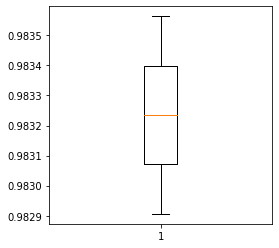

In [ ]:
model1_all_test_acc = pd.read_csv(output_dir_path+"model1_all_test_acc.csv")

import matplotlib.pyplot as plt

fig = plt.figure(figsize= (4, 4))
plt.boxplot(model1_all_test_acc.iloc[:,1])

fig.savefig(output_dir_path+"model1_test_acc_boxplot.png", dpi = 600)

In [ ]:
model2_final_output = Multi_Run_CNN_Model(num_replicates = 2,
                                   conv_layers =  [32, 16],
                                   dense_layers = [20, 10],
                                   kernel_size = (2,2) ,
                                   input_shape = (120, 120, 3),
                                    output_dim  = 10,
                                    optimizer = 'Adagrad',  # best optimizer
                                    learning_rate = 0.01, # best learning rate
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test,
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20, # best epochs
                                    verbose = 1
                                    )

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
89/89 [==============================] - 25s 273ms/step - loss: 1.7747 - accuracy: 0.2955 - val_loss: 1.0242 - val_accuracy: 0.5549
Epoch 2/20
89/89 [==============================] - 24s 268ms/step - loss: 0.6056 - accuracy: 0.7235 - val_loss: 0.4135 - val_accuracy: 0.8634
Epoch 3/20
89/89 [==============================] - 24s 265ms/step - loss: 0.2043 - accuracy: 0.9429 - val_loss: 0.1010 - val_accuracy: 0.9831
Epoch 4/20
89/89 [==============================] - 23s 263ms/step - loss: 0.1021 - accuracy: 0.9701 - val_loss: 0.0628 - val_accuracy: 0.9831
Epoch 5/20
89/89 [==============================] - 24s 266ms/step - loss: 0.0687 - accuracy: 0.9753 - val_loss: 0.0896 - val_accuracy: 0.9676
Epoch 6/20
89/89 [==============================] - 23s 263ms/step - loss: 0.1424 - accuracy: 0.9595 - val_loss: 0.0659 - val_accuracy: 0.9831
Epoch 7/20
89/89 [=====

In [ ]:
model2_final_output

{'best_model': {'model': <keras.engine.sequential.Sequential at 0x7f67207289d0>,
  'model_history': <keras.callbacks.History at 0x7f67206e4d60>,
  'test_loss': 0.12051379680633545,
  'test_acc': 0.9658119678497314,
  'test_predictions': array([[3.92506954e-05, 2.94174299e-13, 1.81658901e-08, ...,
          8.94256688e-20, 0.00000000e+00, 0.00000000e+00],
         [6.74716449e-10, 2.93620378e-05, 8.37814271e-01, ...,
          3.98012623e-13, 0.00000000e+00, 0.00000000e+00],
         [8.46456805e-06, 4.71729643e-12, 1.13876535e-08, ...,
          2.36666568e-18, 0.00000000e+00, 0.00000000e+00],
         ...,
         [4.75079198e-10, 5.82169350e-13, 9.98981178e-01, ...,
          2.94298388e-17, 0.00000000e+00, 0.00000000e+00],
         [9.92597580e-01, 5.00158942e-11, 8.06927147e-08, ...,
          2.51024190e-18, 0.00000000e+00, 0.00000000e+00],
         [9.49769914e-01, 5.45088037e-11, 5.66996619e-07, ...,
          1.23284769e-19, 0.00000000e+00, 0.00000000e+00]], dtype=float32)},
 

In [ ]:
#full results
write_dic_to_file(model2_final_output, output_dir_path+ "model2_full_results" + ".txt")
# Test accuracies from all replicates
pd.DataFrame(model2_final_output['all_test_acc']).to_csv(output_dir_path+"model2_all_test_acc.csv")

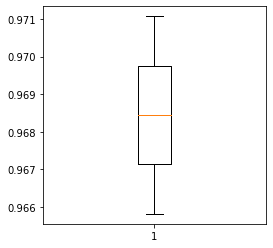

In [ ]:
model2_all_test_acc = pd.read_csv(output_dir_path+"model2_all_test_acc.csv")

import matplotlib.pyplot as plt

fig = plt.figure(figsize= (4, 4))
plt.boxplot(model2_all_test_acc.iloc[:,1])

fig.savefig(output_dir_path+"model2_test_acc_boxplot.png", dpi = 600)
plt.show()

In [ ]:
model3_final_output = Multi_Run_CNN_Model(num_replicates = 2,
                                   conv_layers =  [32, 16, 8],
                                   dense_layers = [20, 10],
                                   kernel_size = (2,2) ,
                                   input_shape = (120, 120, 3),
                                    output_dim  = 10,
                                    optimizer = 'Adam',  # best optimizer
                                    learning_rate = 0.001, # best learning rate
                                    X_train = X_train,
                                    y_train = y_train,
                                    X_test = X_test,
                                    y_test =  y_test,
                                    val_split = 0.2,
                                    batch_size = 32,
                                    epochs = 20, # best epochs
                                    verbose = 1
                                    )

===== Running 0 replicate=======
Building CNN Model.......................

Fitting  CNN Model.......................

Epoch 1/20
89/89 [==============================] - 25s 274ms/step - loss: 1.1416 - accuracy: 0.5618 - val_loss: 0.3208 - val_accuracy: 0.8718
Epoch 2/20
89/89 [==============================] - 25s 278ms/step - loss: 0.2414 - accuracy: 0.9151 - val_loss: 0.1392 - val_accuracy: 0.9606
Epoch 3/20
89/89 [==============================] - 26s 295ms/step - loss: 0.1513 - accuracy: 0.9542 - val_loss: 0.1179 - val_accuracy: 0.9577
Epoch 4/20
89/89 [==============================] - 24s 275ms/step - loss: 0.0981 - accuracy: 0.9701 - val_loss: 0.3131 - val_accuracy: 0.8873
Epoch 5/20
89/89 [==============================] - 24s 275ms/step - loss: 0.0958 - accuracy: 0.9694 - val_loss: 0.1101 - val_accuracy: 0.9620
Epoch 6/20
89/89 [==============================] - 24s 273ms/step - loss: 0.0575 - accuracy: 0.9799 - val_loss: 0.0923 - val_accuracy: 0.9746
Epoch 7/20
89/89 [=====

In [ ]:
model3_final_output

{'best_model': {'model': <keras.engine.sequential.Sequential at 0x7f672072dc40>,
  'model_history': <keras.callbacks.History at 0x7f671d3f64c0>,
  'test_loss': 0.13971620798110962,
  'test_acc': 0.9684418439865112,
  'test_predictions': array([[1.32535293e-03, 2.12240933e-10, 5.47636535e-13, ...,
          9.01748619e-13, 1.37183811e-08, 6.85905013e-11],
         [4.76941642e-09, 7.99132466e-01, 9.77410749e-02, ...,
          5.52216193e-07, 5.46383815e-12, 4.04042052e-03],
         [3.46297934e-03, 8.33579161e-09, 3.06233719e-11, ...,
          1.66209546e-11, 2.59247656e-07, 1.22366883e-09],
         ...,
         [5.48517710e-06, 6.41899300e-04, 9.75743175e-01, ...,
          6.44726184e-09, 5.37985798e-08, 2.36090329e-02],
         [9.79082227e-01, 2.66006973e-05, 4.50387141e-08, ...,
          1.43977175e-07, 3.46392497e-08, 3.78283119e-07],
         [9.77180839e-01, 5.30617754e-08, 1.03466374e-10, ...,
          1.62727121e-09, 7.96838344e-13, 2.30721540e-08]], dtype=float32)},
 

In [ ]:
#full results
write_dic_to_file(model3_final_output, output_dir_path+ "model3_full_results" + ".txt")
# Test accuracies from all replicates
pd.DataFrame(model3_final_output['all_test_acc']).to_csv(output_dir_path+"model3_all_test_acc.csv")

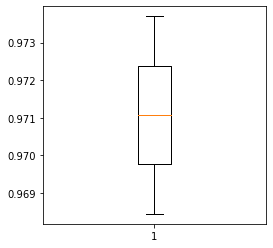

In [ ]:
model3_all_test_acc = pd.read_csv(output_dir_path+"model3_all_test_acc.csv")


import matplotlib.pyplot as plt
fig = plt.figure(figsize= (4, 4))
plt.boxplot(model3_all_test_acc.iloc[:,1])

fig.savefig(output_dir_path+"model3_test_acc_boxplot.png", dpi = 600)
plt.show()

In [ ]:
model1_all_test_acc = pd.read_csv(output_dir_path+"model1_all_test_acc.csv")

model2_all_test_acc = pd.read_csv(output_dir_path+"model2_all_test_acc.csv")
model3_all_test_acc = pd.read_csv(output_dir_path+"model3_all_test_acc.csv")

test_acc_df = pd.DataFrame( {
         'Model1': model1_all_test_acc.iloc[:,1],
         'Model2': model2_all_test_acc.iloc[:,1],
         'Model3': model3_all_test_acc.iloc[:,1]

    })

print(test_acc_df)

     Model1    Model2    Model3
0  0.982906  0.971072  0.973702
1  0.983563  0.965812  0.968442


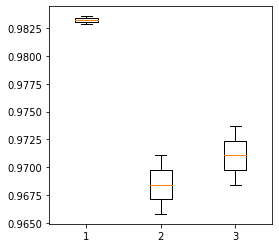

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (4, 4))
plt.boxplot(test_acc_df.T)
fig.savefig(output_dir_path+"all_models_test_acc_boxplots.png", dpi = 600)
plt.show()

In [ ]:
def comparative_test_acc_boxplots(model1_all_test_acc, model2_all_test_acc, model3_all_test_acc):
  data = pd.DataFrame()
  data['Model1'] = model1_all_test_acc
  data['Mode2'] =  model2_all_test_acc
  data['Mode3'] =  model3_all_test_acc
  fig = plt.figure(figsize = (8,5))
  p = plt.boxplot(data.T, patch_artist= True)
  colors = ['mediumblue', 'darkred', 'darkgreen']
  for i, box in enumerate(p['boxes']):
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = colors[i])
  plt.xticks([1,2, 3], ['Model1','Model2', 'Model3'])
  plt.ylabel('Test Accuracy')

  plt.rcParams["axes.edgecolor"] = "0.15"
  plt.rcParams["axes.linewidth"]  = 2.75
  plt.rc('xtick',labelsize=10)
  plt.rc('ytick',labelsize=10)

  fig.savefig(output_dir_path+"comparative_test_acc_boxplots.png",dpi=600)
  plt.show()

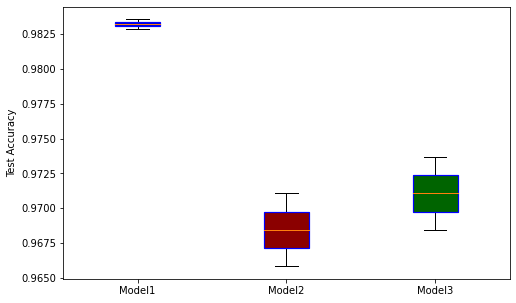

In [ ]:
comparative_test_acc_boxplots(model1_all_test_acc.iloc[:, 1], model2_all_test_acc.iloc[:, 1], model3_all_test_acc.iloc[:, 1])


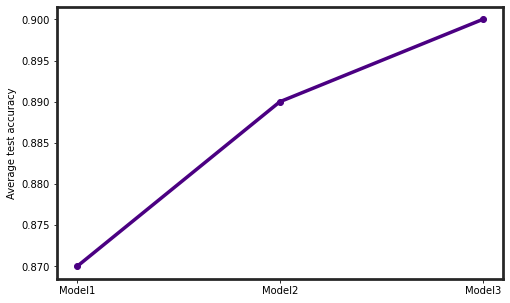

In [ ]:
ave_acc_df = pd.DataFrame(  {
           'Models': ["Model1", "Model2", "Model3"],
           'avg_acc': np.array([.87, 0.89, .90]) # you need to find out this
})

fig = plt.figure(figsize= (8, 5))
plt.plot(ave_acc_df['Models'], ave_acc_df['avg_acc'], '-o', linewidth = 3.5, color = 'indigo' )
plt.ylabel("Average test accuracy")
fig.savefig(output_dir_path+"avg_acc_plot.png", dpi = 600)
plt.show()

### Data Transformation and Input Preparation